In [1]:
import qutip
import tensornetwork as tn
from tensornetwork.visualization.graphviz import to_graphviz 
import qutip_tensornetwork as qtn
from qutip_tensornetwork import Network
import numpy as np
from qutip_tensornetwork import data
%load_ext autoreload
%autoreload 2

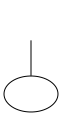

In [2]:
# Create random ket for 24 qubits as a network.
n = 13
random_state = qutip.rand_ket(N=2**n, dims=[[2]*n, [1]*n]).to('network')
random_state.data

In [3]:
# The dimension at this moment of the network is 2**n instead of [2]*n
# That is because we obtained the data transforming it from a dense 
# representation.
random_state.data.out_edges[0].dimension

8192

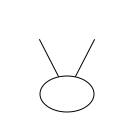

In [4]:
h_single = qutip.operations.hadamard_transform().to('network')
h_single.data

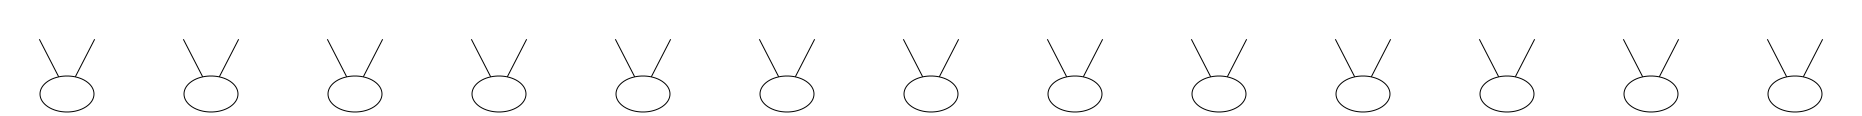

In [5]:
# Tensor operation already included
h_tensor = qutip.tensor([h_single]*n)
to_graphviz(h_tensor.data.nodes, engine='dot')

In [6]:
# H does have the dimension of [2]*n as it was explicitly tensored
h_tensor.data.dims

[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
 [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]

In [7]:
# The two objecst have different dimensions (as networks) but they can 
# still be operated. This is because we reshape the object with compact
# dimension (random_state in this case) to the one with explicit dimension
# assuming that higher level abstractions will keep track of the correct dimension
# at each time, ensuring the operation is valid. 
# This has the disadvantage of having two independent dims:
# the tensor-netowork dims
# and the qobj dims. Not something I like but I guess is the sacrifice 
# we need to make to properly operate with dense without including dims 
# to dense.
result = h_tensor@random_state

In [8]:
%%timeit
# For 13 qubits I notice that it takes 50% more time than for the sparse 
# method I discuss in my blog. That is due to the overhead and Im guessing
# it gets more favourable for the tensor-network approach the more operations
# are included and the larger the system (less memory that needs to move
# around).
result =  h_tensor*random_state
result.data.to_array()

3.87 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
# With dense and large operators it just breaks. We can not represent the operator as dense.
random_state = random_state.to('dense')
h_tensor = h_tensor.to('dense')